In [1]:
import numpy as np

np.random.seed(42) #for repeatability

In [2]:
theta_true = (1, 5, 50) #(b, m, sigma_true)
xdata = 100 * np.random.random(20)
xdata.sort()

In [3]:
print(xdata)

[  2.05844943   5.80836122  15.59945203  15.60186404  18.18249672
  18.34045099  21.23391107  29.12291402  30.4242243   37.45401188
  43.19450186  52.47564316  59.86584842  60.11150117  70.80725778
  73.19939418  83.24426408  86.61761458  95.07143064  96.99098522]


Make a linear function.

In [4]:
ydata = theta_true[0] + theta_true[1] * xdata #b + m*x = y
print(ydata)

[  11.29224715   30.04180608   78.99726017   79.00932022   91.9124836
   92.70225493  107.16955534  146.6145701   153.12112148  188.27005942
  216.97250932  263.37821582  300.3292421   301.55750587  355.0362889
  366.99697091  417.2213204   434.08807289  476.3571532   485.95492608]


In [5]:
#np.random.normal?
# from matplotlib import pyplot as plt
# %pylab inline

# mu, sigma = 0, 0.1
# s = np.random.normal(mu, sigma, 1000)

# count, bins, ignored = plt.hist(s, 30, normed=True)
# plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))*np.exp(- (bins - mu)**2/ (2*sigma**2)), lw=2, c='r')
# plt.show()

In [6]:
ydata = np.random.normal(ydata, theta_true[2]) #theta_true[2] is the spread of dist; aka std

In [7]:
print(ydata)

[ -39.34930887   45.75417271   33.59605639    8.39413515  165.19492205
   81.4134399   110.54596557   75.37716079  125.90198525  193.81618891
  159.42283045  282.16311673  270.2973076   286.97281838  324.95095829
  459.61088013  416.54645916  381.20252644  517.48439881  424.91274358]


# Plot fake data

Populating the interactive namespace from numpy and matplotlib


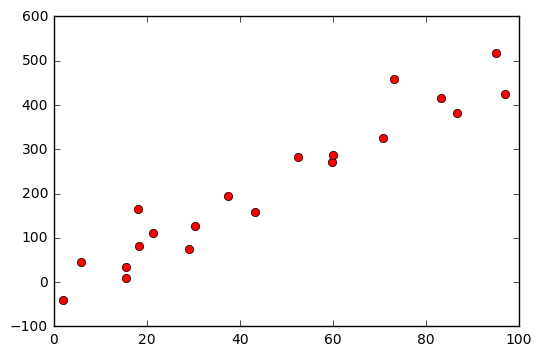

In [8]:
from matplotlib import pyplot as plt
%pylab inline

plt.plot(xdata, ydata, 'ro')
plt.show()

# Fit linear model with ordinary least squares (OLS) 

In [9]:
np.ones_like(xdata) #make array's element all 1

#similar to above
#np.ones(len(xdata))

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [10]:
X = np.vstack([np.ones_like(xdata), xdata])

In [11]:
shape(X.T)

(2, 20)

In [12]:
X.T

array([[  1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ],
       [  2.05844943,   5.80836122,  15.59945203,  15.60186404,
         18.18249672,  18.34045099,  21.23391107,  29.12291402,
         30.4242243 ,  37.45401188,  43.19450186,  52.47564316,
         59.86584842,  60.11150117,  70.80725778,  73.19939418,
         83.24426408,  86.61761458,  95.07143064,  96.99098522]])

In [13]:
np.dot(X.T, X)

array([[  2.00000000e+01,   9.15404577e+02],
       [  9.15404577e+02,   5.98858066e+04]])

In [14]:
np.dot(X.T, ydata)

array([   4324.20875745,  290850.40191649])

In [16]:
theta_hat = np.linalg.solve(np.dot(X.T, X),
                            np.dot(X.T, ydata)) #.T=traspose is necessary for dot product alignment
print(theta_hat)

[-20.25586641   5.16637802]


In [17]:
np.linalg.solve?

Let's check whether we got a correct solution.

In [18]:
np.allclose(np.dot(np.dot(X.T, X), theta_hat), np.dot(X.T, ydata))

True

In [19]:
y_hat = np.dot(X, theta_hat)
sigma_hat = np.std(ydata - y_hat) #stdev of errors

var = sigma_hat ** 2 * np.linalg.inv(np.dot(X.T, X))
print ("intercept: {}\nslope: {}\nsigma: {}".format(theta_hat[0], theta_hat[1], sigma_hat))

intercept: -20.25586641096062
slope: 5.166378020769509
sigma: 44.4254131032301


Let's summarize the steps. Here we will have new data.

In [20]:
import numpy as np

theta_true = (1, 5, 50) #(b,m,sigma_true)
xdata = 100 * np.random.random(50)
xdata.sort()
ydata = theta_true[0] + theta_true[1]*xdata
ydata = np.random.normal(ydata, theta_true[2])

X = np.ones_like(xdata)
X = np.vstack([X, xdata]).T
theta_hat = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,ydata))
y_hat = np.dot(X,theta_hat)
sigma_hat = np.std(ydata - y_hat)
print('slope: {}\nintercept: {}\nsigma= {}'.format(theta_hat[0],theta_true[1], sigma_hat))

slope: -16.580904001158668
intercept: 5
sigma= 47.09935161913405


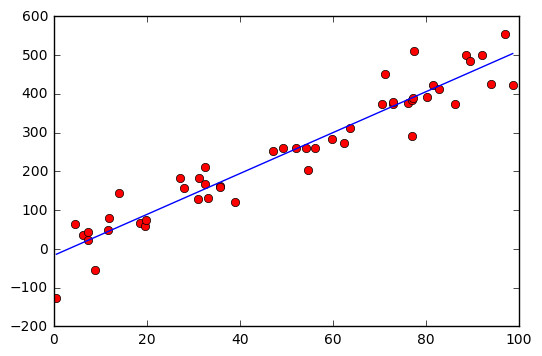

In [21]:
plt.plot(xdata,ydata, 'ro')
plt.plot(xdata, theta_hat[0]+theta_hat[1]*xdata)

In [24]:
from scipy import stats

def confband(xdelta, ydelta, m, b, conf=0.95): #confidence band
    alpha = 1 - conf
    n = xdelta.size
    dof = n - 2
    x = np.linspace(xdelta.min(), xdelta.max(), 100)
    y_hat = m * xdelta + b
    y = m * x + b
    sd = np.std(ydelta - y_hat)
    sxd = np.sum((xdelta - xdelta.mean()) ** 2)
    sx = (x - xdelta.mean()) ** 2
    q = stats.t.ppf(1 - alpha/2., dof) #quantile corresponding to the lower tail= 97.5
    dy = q * sd * np.sqrt(1./n + sx/sxd)
    ucb = y + dy
    lcb = y - dy
    return lcb, ucb, x

In [27]:
#percent point function
stats.t.ppf?

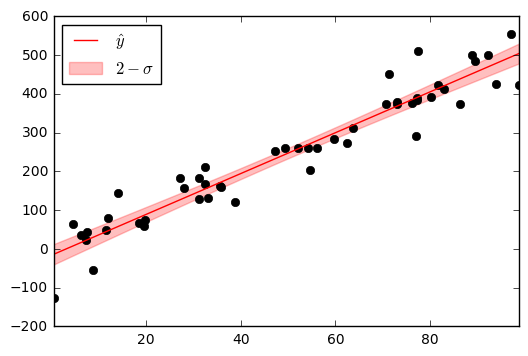

In [28]:
plt.plot(xdata, ydata, 'ko')
plt.plot(xdata, y_hat, 'r-', label='$\hat{y}$')
lcb, ucb, x = confband(xdata, ydata, theta_hat[1], theta_hat[0]) #xdelta, ydelta, m, b
plt.fill_between(x, lcb, ucb, alpha=0.25, color='r', label='$2-\sigma$');
plt.xlim(xdata.min(), xdata.max())
plt.legend(loc=2)

# Maximum Likelihood Estimation

In [29]:
from scipy import optimize as op

def log_like(theta, x, y):      #theta is a tuple
    alpha, beta, sigma = theta  #unpack
    y_model = alpha + beta * x  #linear function
    return -0.5 * np.sum(np.log(2*np.pi*sigma**2) + (y-y_model)**2 / sigma**2)

x0 = (1,1,1)                    #init guess
args = (xdata, ydata)
nll = lambda *x: -log_like(*x) #why 1 value only:? may be X here envelopes a tuple
nll(x0, xdata, ydata)          #but here nll has 3 args
opt = op.minimize(nll, x0, args=args, method='nelder-mead')

In [30]:
opt.x #(b, m, sigma_true)

array([-16.58085425,   5.27706035,  47.09934152])

In [31]:
print(opt.message)
theta_hat = opt.x
y_hat = np.dot(X, theta_hat[:2]) #use 1st & 2nd elements: (b, m)
sigma_hat = theta_hat[2]
print("intercept: {}\nslope: {}\nsigma: {}".format(theta_hat[0], theta_hat[1], sigma_hat))

Optimization terminated successfully.
intercept: -16.580854253684038
slope: 5.277060354710876
sigma: 47.09934152455487


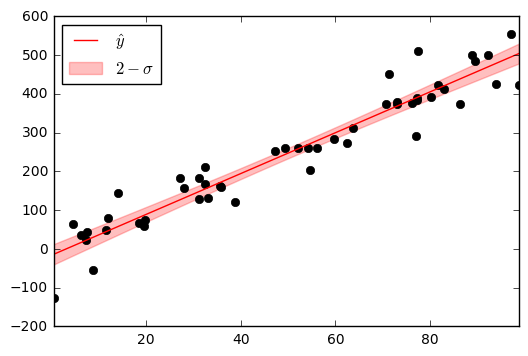

In [32]:
plt.plot(xdata, ydata, 'ko')
plt.plot(xdata, y_hat, 'r-', label='$\hat{y}$')
lcb, ucb, x = confband(xdata, ydata, theta_hat[1], theta_hat[0])
plt.fill_between(x, lcb, ucb, alpha=0.25, color='r', label='$2-\sigma$');
plt.xlim(xdata.min(), xdata.max());
plt.legend(loc=2);

In [35]:
import emcee # version 2.0
import multiprocessing

def log_prior(theta): 
    alpha, beta, sigma = theta #unpack
    if sigma < 0: 
        return -np.inf # log(0)
    else:
        return (-1.5 * np.log(1 + beta**2) - np.log(sigma))
    
def log_posterior(theta, x, y): 
    return log_prior(theta) + log_like(theta,x,y)

In [36]:
ncpu = multiprocessing.cpu_count()
print(ncpu)

4


In [37]:
ndim = 3 # number of parameters in the model 
nwalkers = 50 # number of MCMC walkers 
nburn = 1000 # "burn-in" to stabilize chains 
nsteps = 2000 # number of MCMC steps to take 
starting_guesses = np.random.rand(nwalkers, ndim)

In [38]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, 
                                args=[xdata,ydata], threads=ncpu)
sampler.run_mcmc(starting_guesses, nsteps)

# chain is of shape (nwalkers, nsteps, ndim)
# discard burn-in points and reshape
trace = sampler.chain[:, nburn:, :] 
trace = trace.reshape(-1, ndim)

theta_hat = np.percentile(trace, 50, axis=0)
print("intercept: {}\nslope: {}\nsigma: {}".format(*theta_hat))

intercept: -15.440756547265986
slope: 5.253832435758432
sigma: 48.36600361348702


In [42]:
trace[:2]

array([[  4.70950301,   4.95909812,  51.2424591 ],
       [  3.73758813,   4.97404528,  51.12242579]])

# Walkers during burn-in

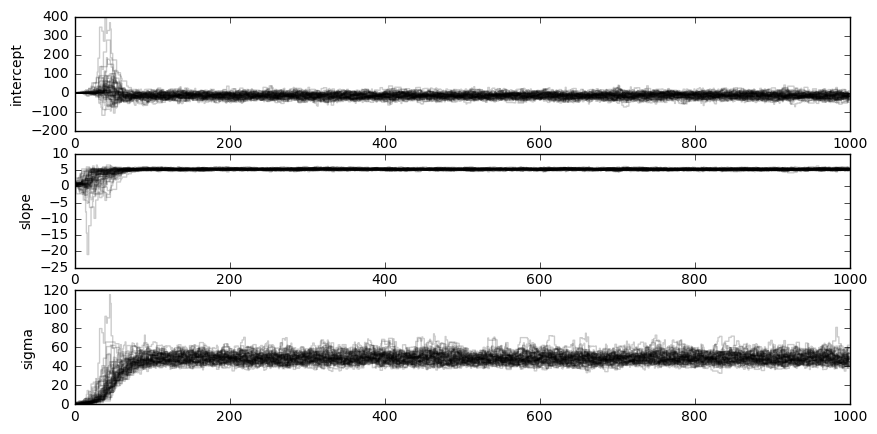

In [43]:
labels = ['intercept', 'slope', 'sigma']
fig = plt.figure(figsize=(10,5))
for i, chain in enumerate(sampler.chain[:, :nburn, :].T):
    plt.subplot(3, 1, i+1)
    plt.plot(chain, drawstyle='steps', color='k', alpha=0.2)
    plt.ylabel(labels[i])

# Walkers after burn in

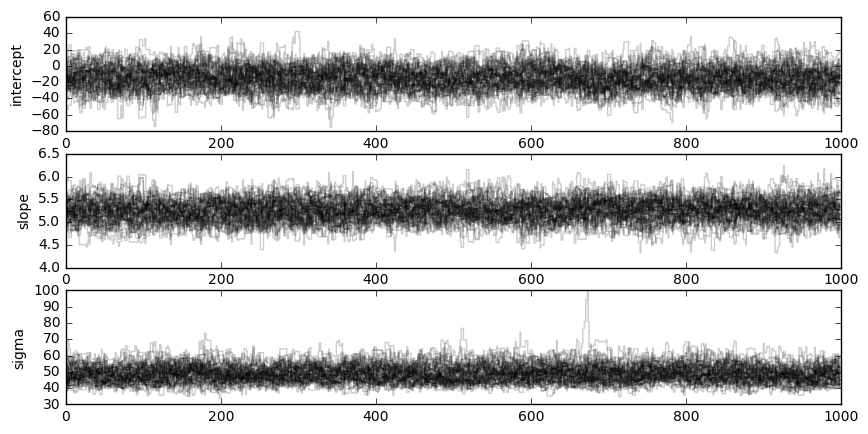

In [45]:
fig = plt.figure(figsize=(10,5))
for i, chain in enumerate(sampler.chain[:, nburn:, :].T):
    plt.subplot(3, 1, i+1)
    plt.plot(chain, drawstyle='steps', color='k', alpha=0.2)
    plt.ylabel(labels[i])

# Posteriors

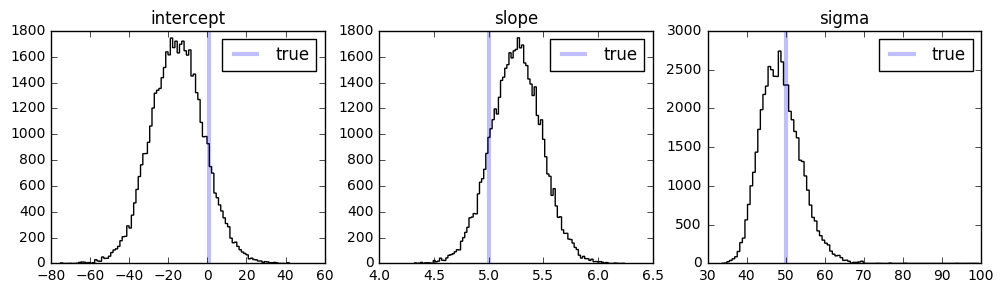

In [46]:
fig = plt.figure(figsize=(12,3))
for i in range(ndim):
    plt.subplot(1,3,i+1)
    plt.hist(trace[:,i], 100, color="k", histtype="step")
    yl = plt.ylim()
    plt.vlines(theta_true[i], yl[0], yl[1], color='blue', lw=3, alpha=0.25, label='true')
    plt.title("{}".format(labels[i]))
    plt.legend()

In [47]:
import corner
fig = corner.corner(trace, labels=labels, quantiles=[0.16, 0.5, 0.84], truths=theta_true)

ImportError: No module named 'corner'

# PyMC

In [49]:
import pymc # version 2.3 

alpha = pymc.Uniform('alpha', -100, 100)

@pymc.stochastic(observed=False) 
def beta(value=0): 
    return -1.5 * np.log(1 + value**2)

@pymc.stochastic(observed=False) 
def sigma(value=1): 
    return -np.log(abs(value))

# Define the form of the model and likelihood 
@pymc.deterministic 
def y_model(x=xdata, alpha=alpha, beta=beta): 
    return alpha + beta * x

y = pymc.Normal('y', mu=y_model, tau=1./sigma**2, observed=True, value=ydata)
# package the full model in a dictionary 
model = dict(alpha=alpha, beta=beta, sigma=sigma, y_model=y_model, y=y)

S = pymc.MCMC(model) 
S.sample(iter=100000, burn=50000) 
trace = np.abs([S.trace('alpha')[:], S.trace('beta')[:], S.trace('sigma')[:]]).T
# np.abs: hack to get rid of negative sigma values
# --> need to learn how to impose priors in pymc

theta_hat = np.percentile(trace, 50, axis=0)
print("\nintercept: {}\nslope: {}\nsigma: {}".format(*theta_hat))

ImportError: No module named 'pymc'

In [ ]:
xmn, xmx = xdata.min(), xdata.max()
xl = np.array([xmn-10, xmx+10])
plt.plot(xdata, ydata, 'ko')
for b, m, s in trace[np.random.randint(len(trace), size=100)]:
    plt.plot(xl, m*xl+b, color="k", alpha=0.1)
plt.plot(xl, theta_true[0] + xl * theta_true[1], color='lightblue', lw=3, alpha=0.8, label='true')
plt.xlim(xmn-5, xmx+5)
plt.legend(loc=2)

In [ ]:
fig = corner.corner(trace, labels=labels, quantiles=[0.16, 0.5, 0.84], truths=theta_true)